      0.455  0.365  0.095   0.514  0.2245   0.101    0.15  15
0     0.350  0.265  0.090  0.2255  0.0995  0.0485  0.0700   7
1     0.530  0.420  0.135  0.6770  0.2565  0.1415  0.2100   9
2     0.440  0.365  0.125  0.5160  0.2155  0.1140  0.1550  10
3     0.330  0.255  0.080  0.2050  0.0895  0.0395  0.0550   7
4     0.425  0.300  0.095  0.3515  0.1410  0.0775  0.1200   8
...     ...    ...    ...     ...     ...     ...     ...  ..
4171  0.565  0.450  0.165  0.8870  0.3700  0.2390  0.2490  11
4172  0.590  0.440  0.135  0.9660  0.4390  0.2145  0.2605  10
4173  0.600  0.475  0.205  1.1760  0.5255  0.2875  0.3080   9
4174  0.625  0.485  0.150  1.0945  0.5310  0.2610  0.2960  10
4175  0.710  0.555  0.195  1.9485  0.9455  0.3765  0.4950  12

[4176 rows x 8 columns]
     Gen
0      1
1      1
2      1
3     -1
4     -1
...   ..
4171   1
4172   1
4173   1
4174   1
4175   1

[4176 rows x 1 columns]

 Vanilla Perceptron
Incorrect values assigned 832
Incorrect values assigned 789
Incorrect values 

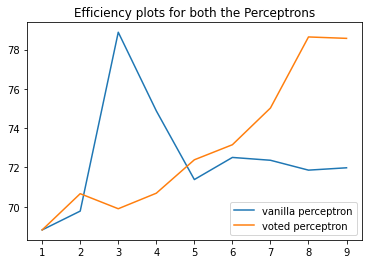

In [167]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("abalone.data")
df = pd.DataFrame(data)
cols =[1,2,3,4,5,6,7,8]
df.drop(df.columns[cols],axis=1,inplace = True)
df.columns =['Gen']


data = pd.read_csv("abalone.data")
X = pd.DataFrame(data)
X.drop(X.columns[0],axis=1,inplace = True)
print(X)
#labels
lbl = 8
w = np.ones(lbl)
b = 0
R = []
 
for index in df.index:
    if df.loc[index,'Gen']=='M':
        df.loc[index,'Gen']= 1
    elif df.loc[index,'Gen']=='F':
        df.loc[index,'Gen']= 1
    else:
        df.loc[index,'Gen'] = -1
print(df)


print('\n Vanilla Perceptron')

effi1=[] 
for j in range(9):
    inc=0
    effi = 0
    for i in range(4176):
        a = np.dot(w,X.iloc[i])+b
        R.append(np.sign(a))
        
#       print(df.iloc[i]['Gen']*a)
        if df.iloc[i]['Gen']*a <=0:
            inc+=1
            w += np.multiply(X.iloc[i],df.iloc[i]['Gen'])
            b += df.iloc[i]['Gen']
    
    for l in range(4176):
        if np.sign(np.dot(w,X.iloc[l])+b)==df.iloc[l]['Gen']:
            effi+=1
    effi1.append(effi)
    
    print("Incorrect values assigned",inc)
print('The W matrix is:\n',w)  
print('B value is:',b)


#2. Implementing voted perceptron

print('\n Voted Perceptron')
w = np.ones(lbl)
b = 0
R = []
c=1
effi2=[]
for j in range(9):
    inc = 0
    b_voted = 0
    voted = 0
    effi = 0
    for i in range(4176):
        a = np.dot(w,X.iloc[i])+b
        c+=1
#       print(df.iloc[i]['Gen']*a)
        if df.iloc[i]['Gen']*a <=0:
            voted += np.multiply(w,c)
            b_voted += np.multiply(b,c)
            #print(c)
            c=1
            inc+=1
            w += np.multiply(X.iloc[i],df.iloc[i]['Gen'])
            b += df.iloc[i]['Gen']
    for l in range(4176):
        if np.sign(np.dot(w,X.iloc[l])+b)==df.iloc[l]['Gen']:
            effi+=1
    effi2.append(effi)     
    
    w = voted/4176
    b = b_voted/4176
    print("Incorrect values assigned",inc)
print('The voted W matrix is:\n',w)
print('The voted b is:',b)


print(effi1)
print(effi2)
effi1 = [ x/41.76 for x in effi1]
effi2 = [ x/41.76 for x in effi2]
#Plotting
Xaxis =[1,2,3,4,5,6,7,8,9]
plt.title("Efficiency plots for both the Perceptrons")
plt.plot(Xaxis, effi1, label = 'vanilla perceptron')
plt.plot(Xaxis, effi2, label = 'voted perceptron')
plt.legend()
plt.show()